<a href="https://colab.research.google.com/github/piriram/SummerDeepLearningStudy/blob/main/week3_Pytorch_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pytorch.org/docs/stable/index.html

In [1]:
# 과제 진행 전에 실행해주세요!

import torch  # torch 모듈 불러오기
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-whitegrid'])

In [2]:
torch.cuda.is_available()

True

In [3]:
!nvidia-smi

Sun Sep 10 14:10:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# 현재 사용 가능한 GPU 개수
print(torch.cuda.device_count())

1


#### 텐서(Tensor)
https://pytorch.org/docs/stable/torch.html
``` python
PyTorch에서 데이터를 표현하기 위해 사용하는 기본 구조입니다.
넘파이의 ndarray와 유사하며, GPU를 사용한 연산 가속이 가능한 것이 특징입니다.

'텐서'
  - tensor vs Tensor
  - zero, one, empty
  - random

'텐서 조작 및 연산'
  - view, reshape, transpose, permute
  - 사칙연산(add, sub, mul, div)
  - 행렬연산(mm, dot, matmul)

'Indexing, Slicing, Joining, Mutating'
  - index_select, masked_select
  - chunk & swapdims
  - cat & stack
  - squeeze & unsqueeze
```

##### 텐서

###### tensor vs Tensor🔥

In [5]:
''' tensor vs Tensor '''

# numpy array 생성
array = np.array([1,2,3])
array2 = np.array([[1,2,3], [4,5,6]])
array3 = np.array([[[1,2,3], [4,5,6]]])
array4 = np.array([[[1,2], [3,4], [5,6]]])

print(array.shape)
print(array2.shape)
print(array3.shape)
print(array4.shape)

# torch 텐서 생성
print(torch.arange(10))

# torch.Tensor와 torch.tensor의 차이점은?
Tensor = torch.Tensor(array)
tensor = torch.tensor(array)

print(Tensor)
print(tensor)

(3,)
(2, 3)
(1, 2, 3)
(1, 3, 2)
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([1., 2., 3.])
tensor([1, 2, 3])


In [6]:
'''GPU에 텐서 할당하기'''
array = np.array([1,2,3])
Tensor = torch.Tensor(array)
tensor = torch.tensor(array)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# GPU에 텐서 할당
Tensor_GPU = Tensor.to(device)
tensor_GPU = tensor.to(device)

print(Tensor_GPU, tensor_GPU)

cuda
tensor([1., 2., 3.], device='cuda:0') tensor([1, 2, 3], device='cuda:0')


In [7]:
'''텐서 -> 넘파이, 넘파이 -> 텐서 '''

#np_array = np.array(Tensor_GPU)
np_array = np.array(Tensor_GPU.cpu())
Tensor = torch.from_numpy(np_array)
print(np_array, Tensor)

[1. 2. 3.] tensor([1., 2., 3.])


###### zero, one, empty🔥

In [8]:
''' zero, one, empty '''

zero = torch.zeros((5,6), dtype = torch.float)
one = torch.ones((5,6), dtype = torch.float)
empty = torch.empty((5,6))

print(zero)
print(one)
print(empty)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[       nan, 0.0000e+00, 7.0065e-43, 4.4842e-44, 0.0000e+00, 0.0000e+00],
        [4.0016e-33, 4.3349e-41, 0.0000e+00, 1.0930e-43,        nan, 0.0000e+00],
        [7.0205e-43, 4.4842e-44, 0.0000e+00, 0.0000e+00, 9.0093e+23, 3.1561e-41],
        [6.4648e+29, 1.1070e-43,        nan, 0.0000e+00, 7.0345e-43, 4.4842e-44],
        [0.0000e+00, 0.0000e+00, 9.0093e+23, 3.1561e-41, 9.9270e-13, 1.1210e-43]])


###### random🔥

In [9]:
''' random '''
torch.rand((2,5))
torch.randint(0, 10, (2,5))
torch.randn(3,5)

torch.manual_seed(0)  # seed를 받으면 그 값을 변형해서 활용
a = torch.rand(3,4)
b = torch.rand(3,4)

print(a)
print(b)

tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])
tensor([[0.0223, 0.1689, 0.2939, 0.5185],
        [0.6977, 0.8000, 0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742]])


##### 텐서 조작 및 연산

###### view, reshape, transpose, permute🔥🔥🔥

In [10]:
''' view, reshape, transpose, permute '''

# view, reshape
a = torch.Tensor([1,2,3,4,5,6,7,8])

print(a.shape)
print(a.view((2,2,2)).shape)
print(a.reshape((2,2,2)).shape)
print(a.reshape(4, -1).shape)

# transpose
b = torch.Tensor([[1,2],
                  [3,4]])
print(b.transpose(0,1))

# permute
c = torch.Tensor([[[1,2],
                  [3,4],
                  [5,6]]])
print(c.shape)
print(c.permute(0,2,1).shape)

torch.Size([8])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])
torch.Size([4, 2])
tensor([[1., 3.],
        [2., 4.]])
torch.Size([1, 3, 2])
torch.Size([1, 2, 3])


###### 사칙연산(add, sub, mul, div)🔥🔥

In [11]:
''' 사칙연산(add, sub, mul, div) '''

a = torch.Tensor([3])
b = torch.Tensor([8])

torch.add(a,b)
torch.sub(a,b)
torch.mul(a,b)
torch.div(a,b)

tensor([0.3750])

###### 행렬연산(mm, dot, matmul)🔥🔥

In [12]:
''' 행렬연산(mm, dot, matmul) '''

a = torch.rand(3,4)
b = torch.rand(4,5)
c = torch.Tensor([1,2,3])
d = torch.Tensor([4,5,6])


torch.mm(a,b) # 행렬 연산만
torch.dot(c,d) # 벡터 연산만
torch.matmul(a,b) # 둘다, 브로드캐스팅

tensor([[1.0350, 1.4941, 0.6072, 0.8774, 1.1431],
        [1.3076, 1.2835, 0.7602, 1.1148, 0.6297],
        [0.2569, 0.4630, 0.1961, 0.2671, 0.2880]])

##### Indexing, Slicing, Joining, Mutating

###### index_select & masked_select🔥🔥

In [13]:
''' index_select '''

b = torch.Tensor([[1,2],
                  [3,4],
                  [5,6]])


index = torch.tensor([1])
print(torch.index_select(b, 1, index))

''' python indexing '''
a = torch.Tensor([1,2,3])
print(a[0])


b = torch.Tensor([[1,2],
                  [3,4],
                  [5,6]])
print(b[:, 1])

tensor([[2.],
        [4.],
        [6.]])
tensor(1.)
tensor([2., 4., 6.])


In [14]:
''' masked_select '''
a = torch.Tensor([1,2,3,4,5,6,7,8,9])
a[a>5]

x = torch.randn(2,3)
print(x)

# mask는 True 또는 False 값을 가지는 BoolTensor.
mask = torch.tensor([[0,0,1],[0,1,0]], dtype=torch.bool)
torch.masked_select(x,mask)

tensor([[-0.0209, -0.7185,  0.5186],
        [-1.3125,  0.1920,  0.5428]])


tensor([0.5186, 0.1920])

###### chunk & swapdims🔥

In [15]:
''' torch.chunk & torch.swapdims '''

# torch.chunk -> 텐서 쪼개기(텐서, 몇 개로 쪼갤지, 기준 차원)
x = torch.Tensor([[[1,2,3], [4,5,6], [7,8,9]]])
output = torch.chunk(x, 2, 1)
print(output)

# torch.swapdims -> 텐서 축 바꾸기(텐서, 바꿀 차원, 어느 dimension과 바꿀지)
x = torch.tensor([[[1,2,3], [4,5,6]]])
print(x)
print(x.shape)

output = torch.swapdims(x, 0, 2)
print(output)
print(output.shape)

(tensor([[[1., 2., 3.],
         [4., 5., 6.]]]), tensor([[[7., 8., 9.]]]))
tensor([[[1, 2, 3],
         [4, 5, 6]]])
torch.Size([1, 2, 3])
tensor([[[1],
         [4]],

        [[2],
         [5]],

        [[3],
         [6]]])
torch.Size([3, 2, 1])


###### cat & stack🔥🔥

In [16]:
''' torch.cat & torch.stack '''

a = torch.Tensor([[1,2,3]])
b = torch.Tensor([[4,5,6]])

print(torch.cat([a,b], dim = 0))  # 차원 유지
print(torch.stack([a,b], dim = 2))  # 지정하는 차원으로 확장

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[[1., 4.],
         [2., 5.],
         [3., 6.]]])


###### squeeze & unsqueeze🔥🔥

In [17]:
''' squeeze & unsqueeze'''

a = torch.Tensor([[1,2,3]])

print(a.shape)
print(a.squeeze().shape)
print(a.unsqueeze(2).shape)

torch.Size([1, 3])
torch.Size([3])
torch.Size([1, 3, 1])


#### AutoGrad(자동 미분)
https://pytorch.org/docs/stable/autograd.html

https://gaussian37.github.io/dl-pytorch-gradient/
``` python
PyTorch에서 제공하는 자동 미분 엔진입니다.
출력으로부터 역방향으로 이동하면서 오차(예측값-정답값)에 대한 함수들의 매개변수들의 미분값을 수집합니다.

'AutoGrad'
- requires_grad
- backward
- no_grad
```

##### AutoGrad

###### requires_grad


In [18]:
''' requires_grad '''

# requires_grad = True -> 연산 과정을 저장합니다. 연산 과정에 따라 역전파 방식이 달라지기에, 연산 방식과 연산값을 저장하는 것은 학습에 있어 필수적입니다.
a = torch.tensor([2., 3.], requires_grad = True)
b = torch.tensor([6., 4.], requires_grad = True)
c = torch.tensor([2., 8.], requires_grad = True)

d = torch.Tensor([2, 3])
e = torch.Tensor([6, 4])
f = torch.Tensor([2, 8])

print(a)
print(d)
print(a+b)
print(a*b)

tensor([2., 3.], requires_grad=True)
tensor([2., 3.])
tensor([8., 7.], grad_fn=<AddBackward0>)
tensor([12., 12.], grad_fn=<MulBackward0>)


In [19]:
# 임의의 Loss 함수
Loss_req = a**2 - 2*b + 4*c**3
#Loss = d**2 - 2*e + 4*f**3

###### backward

In [20]:
''' backward '''

Loss_req.sum().backward()  # backward 함수를 사용하기 위해선, output 형태를 scalar 형태로 바꿔줘야 합니다.
#Loss.sum().backward()

In [21]:
print(a.grad)
print(b.grad)
print(c.grad)

tensor([4., 6.])
tensor([-2., -2.])
tensor([ 48., 768.])


###### no_grad

In [22]:
''' no_grad '''
# 계산 과정을 일일히 저장하는 것은 상당한 컴퓨터 메모리를 차지합니다.
# 또한, 모델을 test할 때는 가중치가 갱신되면 안되므로. 역전파를 위한 연산값들 역시 저장할 필요가 없습니다.

with torch.no_grad():
  Loss_req = a**2 - 2*b + 4*c**3
  print(a.requires_grad)
  print(b.requires_grad)
  print(c.requires_grad)
  print((a**2).requires_grad)

print(Loss_req.requires_grad)

True
True
True
False
False


#### torch.nn
https://pytorch.org/docs/stable/nn.html
``` python
신경망 구현에 필요한 다양한 Layer들을 제공해줍니다.
특정 task와 상관없이 자주 사용되는 Layer들을 살펴보겠습니다.

'Layers'
- nn.Linear & nn.Identity
- nn.BatchNorm1d
- nn.Dropout
```

##### Layers

###### nn.Linear & nn.Identity

``` python
1주차에 배웠던 y = Wx + b 공식은 nn.Linear를 활용하면 쉽게 표현할 수 있습니다.
```

In [23]:
''' nn.Linear '''

import torch.nn as nn

Linear = nn.Linear(in_features = 3, out_features = 4, bias = True)

a = torch.rand(3)
result = Linear(a)

print(result)
print(result.shape)

tensor([-0.2808,  0.6815,  0.9970, -1.0027], grad_fn=<AddBackward0>)
torch.Size([4])


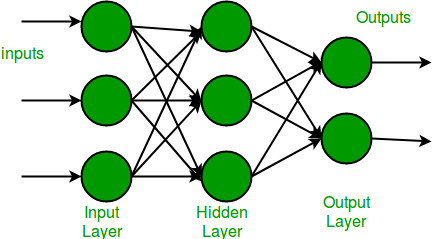

In [24]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features = 3, out_features = 3)
    self.linear2 = nn.Linear(in_features = 3, out_features = 2)

  def forward(self, x):
    x = self.linear1(x)
    result = self.linear2(x)
    return result

In [25]:
''' nn.Identity '''

data = torch.rand(3)

mlp = MLP()
result = mlp.forward(data)
print(result)

tensor([-0.3060, -0.1743], grad_fn=<AddBackward0>)


In [26]:
identity = nn.Identity()

result_i = identity(result)
print(result_i)

tensor([-0.3060, -0.1743], grad_fn=<AddBackward0>)


###### nn.BatchNorm1d
https://gaussian37.github.io/dl-concept-batchnorm/
``` python
epoch : 학습 데이터 전체를 학습하는 횟수
batch : 가중치를 업데이트하는 단위 = Gradient를 구하는 단위

각 배치별 데이터의 분포가 같아지도록 평균은 0, 표준편차는 1로 정규화합니다.
학습을 안정화하고 Gradient Vanishing(Exploding) 문제를 해결할 수 있다는 장점이 있습니다.
```
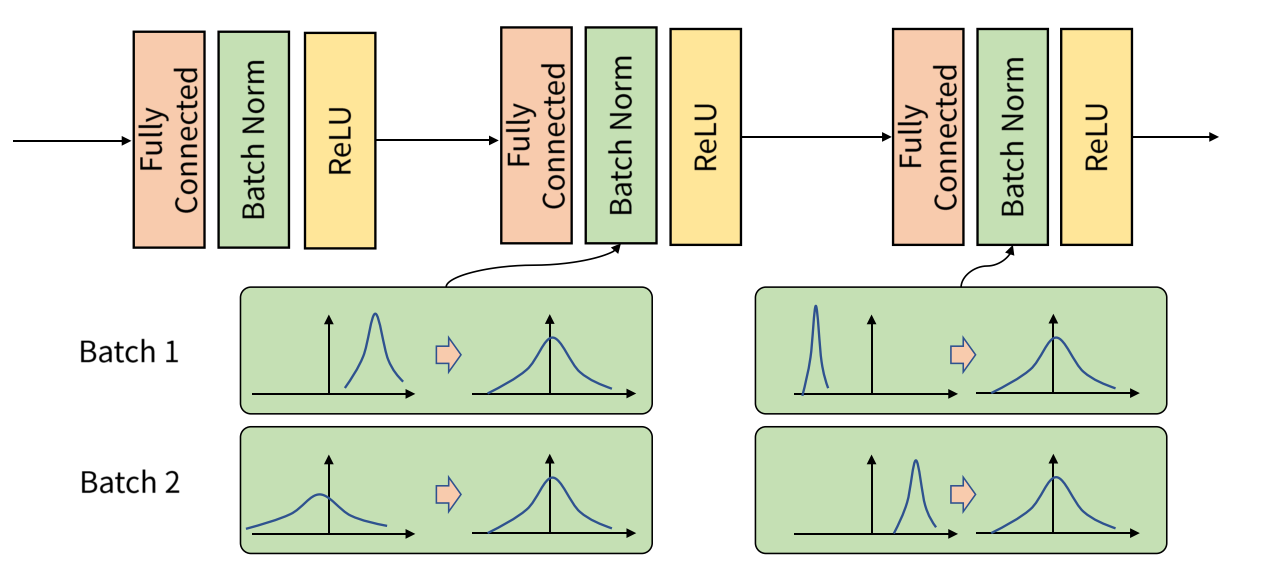

In [27]:
a = torch.rand(10, 1000)

nn_batchnorm = nn.BatchNorm1d(1000, affine = False)
result_bn = nn_batchnorm(a)
print(result_bn)

tensor([[-0.7395,  2.0643, -1.0907,  ..., -1.2649,  1.1711, -0.5047],
        [-0.8328, -1.5308, -0.6772,  ..., -0.4721,  1.9509,  0.7692],
        [ 0.2252,  0.0638,  0.1247,  ...,  1.1440,  1.1243,  0.8325],
        ...,
        [ 0.6192, -0.4030,  1.0418,  ...,  1.0930, -0.7469,  0.8765],
        [ 1.5518,  0.3436, -0.1791,  ..., -1.2832, -0.9403, -1.5983],
        [-0.1895,  1.1338,  1.7165,  ..., -0.1532, -0.0645,  0.3724]])


###### nn.Dropout
``` python
Dropout은 Overfitting을 막기 위한 방법 중 하나로, 하이퍼파라미터로 설정해준 확률에 따라 각 뉴런들이 꺼집니다.

모델의 복잡도를 감소시키고, 연산량도 감소시킨다는 장점이 있습니다.
```
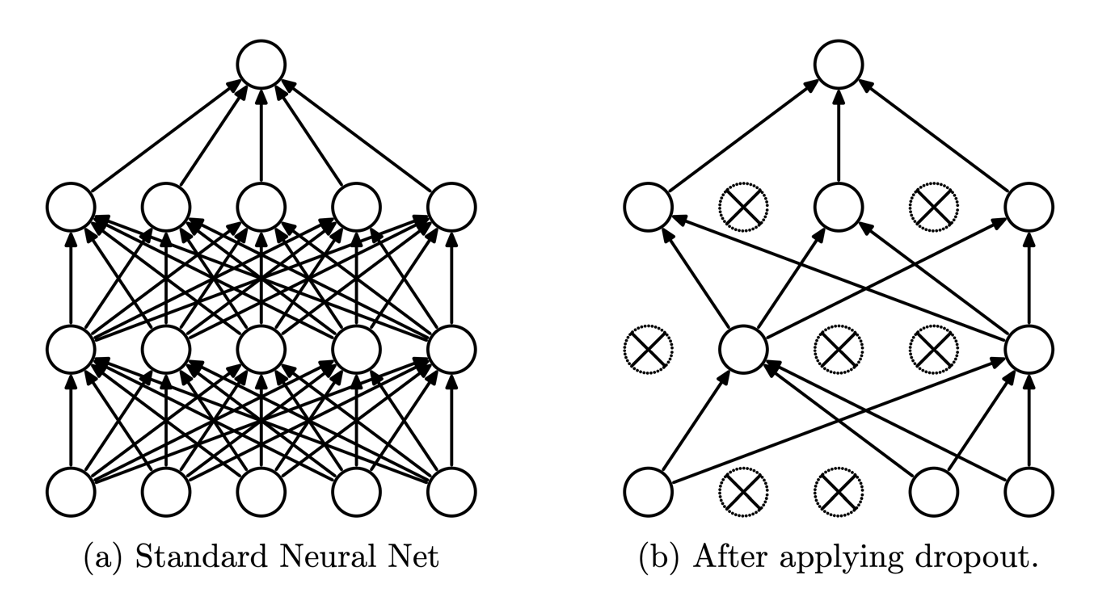
출처 : Dropout: a simple way to prevent neural networks from overfitting, Srivastava et al., Journal of Machine Learning Research, 2014



In [28]:
torch.manual_seed(0)  # random seed 고정
a = torch.rand(50)

dropout = nn.Dropout(0.4)
result = dropout(a)

print(a)
print(result)

tensor([0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901, 0.8964, 0.4556,
        0.6323, 0.3489, 0.4017, 0.0223, 0.1689, 0.2939, 0.5185, 0.6977, 0.8000,
        0.1610, 0.2823, 0.6816, 0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527,
        0.0362, 0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507, 0.0317,
        0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437, 0.5846, 0.0332, 0.1387,
        0.2422, 0.8155, 0.7932, 0.2783, 0.4820])
tensor([0.8271, 1.2804, 0.0000, 0.0000, 0.0000, 1.0568, 0.8168, 0.0000, 0.7594,
        1.0538, 0.0000, 0.6695, 0.0372, 0.2814, 0.0000, 0.0000, 1.1628, 1.3334,
        0.2684, 0.4704, 1.1360, 1.5253, 0.6618, 1.4569, 0.6990, 0.0000, 1.5879,
        0.0603, 0.0000, 0.6224, 0.0000, 1.5533, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3469, 1.5497, 1.2052, 1.2372, 0.8772, 0.0000, 0.9743, 0.0553, 0.0000,
        0.0000, 0.0000, 1.3219, 0.4638, 0.0000])


#### torch.optim
https://pytorch.org/docs/stable/optim.html
``` python
torch.optim에는 다양한 Optimizer들이 미리 구현되어 있습니다.
어떠한 Optimizer들이 있는지 살펴보고 더 자세히 알아봅시다.

'Optimizers'
- SGD
- Adagrad & RMSprop
- Adam & AdamW

'optimize function'
- step
- zero_grad
```

##### Optimizers

In [29]:
import torch.optim as optim

#sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#adagrad = optim.Adagrad(model.parameters(), lr=0.01)
#rmsprop = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)
#adam = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
#adamw = optim.AdamW(model.parameters(), lr=0.001, betas=(0.9, 0.999))

##### Optimize function

###### step

In [30]:
'''
loss.backward를 통해 구한 gradient 값을 바탕으로 파라미터들을 업데이트합니다.
즉, 모델의 가중치가 업데이트되는 시점은 optimizer.step()이 실행되는 순간입니다.
model.parameters()를 통해 모델의 가중치들에 접근가능해지고, 이를 바탕으로 가중치 갱신을 진행합니다.
'''

'\nloss.backward를 통해 구한 gradient 값을 바탕으로 파라미터들을 업데이트합니다.\n즉, 모델의 가중치가 업데이트되는 시점은 optimizer.step()이 실행되는 순간입니다.\nmodel.parameters()를 통해 모델의 가중치들에 접근가능해지고, 이를 바탕으로 가중치 갱신을 진행합니다.\n'

###### zero_grad

In [31]:
# gradient를 초기화해주는 함수입니다(PPT 참고)